<a href="https://colab.research.google.com/github/CarlosTertuliano/imersao_dados_4/blob/main/imersao_dados_4_dia_3_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos, Time Series e Análise Exploratória

---



In [27]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [28]:
dados [["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

In [29]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

In [30]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Na aula anterior realizamos a exclusão dos dados que não correspondiam a venda dos imóveis, os passos anteriores são apenas uma réplica do que já foi mostrado anteriormente. Também identificamos uma forma de calcular o valor do m², que será feito a seguir.

In [31]:
dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace('.', '').astype(float)

pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
dados_bairro = dados_vendas.groupby("Bairro").sum().reset_index()

dados_bairro["Valor_metro"] = dados_bairro["Valor_anuncio"]/dados_bairro["Metragem"]

top_bairros = dados_bairro["Bairro"].value_counts()[:10].index

dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_metro
0,Aclimação,19447,258,240,230,139292801.00,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34
...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,4283.84
693,Água Branca,2083,37,39,27,14718000.00,7065.77
694,Água Fria,1985,34,41,30,11125000.00,5604.53
695,Água Funda,278,6,5,4,1090000.00,3920.86


Agora que temos as informações necessárias para prosseguir vamos para os desafios da aula 3. 

---



# Desafio 1: Tentar vincular dados do IBGE com os dados de imóveis.

In [33]:
url_ibge = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"

dados_ibge = pd.read_csv(url_ibge,encoding = 'UTF-8', sep = ';', decimal=',')

dados_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


Para obtermos mais informações sobre os nossos dados e os tipos deles utilizaremos a função *info( )*. 

In [34]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

Juntamente aos dados é disponibilizado um arquivo para auxiliar no entendimento das variáveis, na página 45 temos em uma tabela a explicação de cada uma delas. Segue o link caso deseje saber o que elas representam: https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view

In [35]:
dados_ibge["Nome_do_distrito"].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

Logo de cara percebemos a presença de alguns caracteres estranhos em nossos dados, normalmente eles seriam ajustados por algum tipo de codificação específico, porém como nenhum dos que foram testados funcionou tivemos que partir para a força bruta.

In [36]:
dados_ibge = dados_ibge.replace({'Nome_do_distrito' : 
 {'BEL�M' : 'BELÉM',
  'BRASIL�NDIA' : 'BRASILÂNDIA',
  'BR�S' : 'BRÁS',
  'BUTANT�' : 'BUTANTÃ',
  'CAP�O REDONDO' : 'CAPÃO REDONDO',
  'CARR�O' : 'CARRÃO',
  'CONSOLA��O' : 'CONSOLAÇÃO',
  'FREGUESIA DO �' : 'FREGUESIA DO Ó',
  'GRAJA�' : 'GRAJAÚ',
  'JAGUAR�' : 'JAGUARÉ',
  'JARAGU�' : 'JARAGUÁ',
  'JARDIM S�O LU�S' : 'JARDIM SÃO LUÍS',
  'JARDIM �NGELA' : 'JARDIM ÂNGELA',
  'JA�AN�' : 'JAÇANÃ',
  'JOS� BONIF�CIO' : 'JOSÉ BONIFÁCIO',
  'LIM�O' : 'LIMÃO',
  'REP�BLICA' : 'REPÚBLICA',
  'SACOM�' : 'SACOMÃ',
  'SANTA CEC�LIA' : 'SANTA CECÍLIA',
  'SA�DE' : 'SAÚDE',
  'S�' : 'SÉ',
  'S�O DOMINGOS' : 'VILA SÃO DOMINGOS',
  'S�O LUCAS' : 'SÃO LUCAS',
  'S�O MATEUS' : 'SÃO MATEUS',
  'S�O MIGUEL' : 'SÃO MIGUEL',
  'S�O RAFAEL' : 'SÃO RAFAEL',
  'TATUAP�' : 'TATUAPÉ',
  'TREMEMB�' : 'TREMEMBÉ',
  'VILA CURU��' : 'VILA CURUÇÁ',
  'VILA JACU�' : 'VILA JACUÍ',
  'VILA S�NIA' : 'VILA SÔNIA',
  '�GUA RASA' : 'ÁGUA RASA'}})

Podemos prosseguir com o tratamento das informações para que seja possível realizar uma análise juntando as duas bases.

In [37]:
dados_bairro["Bairro"] = dados_bairro["Bairro"].str.upper()

dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_metro
0,ACLIMAÇÃO,19447,258,240,230,139292801.00,7162.69
1,ALTO DA BOA VISTA,3351,33,41,37,19130000.00,5708.74
2,ALTO DA LAPA,23940,252,308,320,166653500.00,6961.30
3,ALTO DA MOOCA,5401,66,52,73,23683400.00,4385.00
4,ALTO DE PINHEIROS,158616,1453,1782,1827,1764815915.00,11126.34
...,...,...,...,...,...,...,...
692,VILA ÁGUA FUNDA,761,13,11,13,3260000.00,4283.84
693,ÁGUA BRANCA,2083,37,39,27,14718000.00,7065.77
694,ÁGUA FRIA,1985,34,41,30,11125000.00,5604.53
695,ÁGUA FUNDA,278,6,5,4,1090000.00,3920.86


In [38]:
ibge_bairros = dados_ibge.groupby("Nome_do_distrito").mean().reset_index()

ibge_bairros.rename({'Nome_do_distrito': 'Bairro'}, axis = 1, inplace = True)

ibge_bairros

,Bairro,Cod_setor,Cod_Grandes Regi�es,Cod_UF,Cod_meso,Cod_micro,Cod_RM,Cod_municipio,Cod_distrito,Cod_subdistrito,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,ALTO DE PINHEIROS,355030802000040.12,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030802.00,35503080200.00,...,1.76,7512.90,157080417.69,8412.86,167185062.14,4309.55,78102509.24,6181.14,98318549.17,NaN
1,ANHANGUERA,355030803000058.31,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030803.00,35503080300.00,...,2.38,983.74,935527.93,1135.90,903434.64,600.48,668942.82,992.65,678973.93,NaN
2,ARICANDUVA,355030804000063.06,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030804.00,35503080400.00,...,2.39,1312.31,2732699.34,1534.69,2799250.29,883.29,2066736.89,1337.44,2430271.23,NaN
3,ARTUR ALVIM,355030805000075.00,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030805.00,35503080500.00,...,2.26,1267.56,1451882.34,1424.76,1426726.70,853.14,1087732.26,1248.47,1093372.72,NaN
4,BARRA FUNDA,355030806000016.75,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030806.00,35503080600.00,...,1.71,3629.43,24151148.36,4142.98,26135768.10,2744.02,20640924.33,3641.36,24006939.43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,VILA MEDEIROS,355030892000111.00,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030892.00,35503089200.00,...,2.78,1172.58,2060233.65,1430.31,2177729.39,816.22,1327104.33,1246.37,1480356.05,NaN
92,VILA PRUDENTE,355030893000081.06,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030893.00,35503089300.00,...,1.98,2171.72,10775529.92,2470.10,11060069.70,1403.89,6428457.22,2052.70,7558777.59,NaN
93,VILA SÃO DOMINGOS,355030895000063.25,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030895.00,35503089500.00,...,2.33,1592.76,5104571.77,1926.72,5299338.48,1065.33,3333977.15,1625.65,4010084.70,NaN
94,VILA SÔNIA,355030894000134.56,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030894.00,35503089400.00,...,2.05,3320.56,24154020.13,3779.61,25432418.69,2150.75,16727566.53,3103.80,21353154.77,NaN


Percebe-se que existe uma diferença entre o tamanho das bases, isso poderá prejudicar nossos resultados. Por enquanto iremos prosseguir com esse método, na próxima aula traremos um método mais efetivo e poderá ser feita a comparação entre os dois.

In [39]:
len(dados_ibge["Nome_do_distrito"].unique())

96

In [40]:
len(dados_bairro["Bairro"].unique())

697

Para evidenciar a diferença entre as bases.

In [41]:
dados_combinados = pd.merge(dados_bairro, ibge_bairros, how = 'inner', on = 'Bairro')

dados_combinados.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_metro,Cod_setor,Cod_Grandes Regi�es,Cod_UF,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,ALTO DE PINHEIROS,158616,1453,1782,1827,1764815915.00,11126.34,355030802000040.12,3.00,35.00,...,1.76,7512.90,157080417.69,8412.86,167185062.14,4309.55,78102509.24,6181.14,98318549.17,NaN
1,ARICANDUVA,278,3,3,2,480000.00,1726.62,355030804000063.06,3.00,35.00,...,2.39,1312.31,2732699.34,1534.69,2799250.29,883.29,2066736.89,1337.44,2430271.23,NaN
2,BARRA FUNDA,2438,45,43,25,13836003.00,5675.14,355030806000016.75,3.00,35.00,...,1.71,3629.43,24151148.36,4142.98,26135768.10,2744.02,20640924.33,3641.36,24006939.43,NaN
3,BELA VISTA,190,3,2,1,960000.00,5052.63,355030807000071.69,3.00,35.00,...,1.79,3802.59,36106813.24,4150.94,37407059.46,2777.62,38128554.92,3477.69,43882984.11,NaN
4,BOM RETIRO,673,6,4,4,3000000.00,4457.65,355030809000025.50,3.00,35.00,...,2.84,1648.11,4210560.86,2010.42,4633743.84,1171.86,5295394.52,1749.16,6401326.32,NaN


Para melhor comparação buscamos realizar a interseção entre os dados da tabela, ou seja, juntar elas a partir do que elas tem em comum. Abaixo vemos que alguns dados foram perdidos nessa combinação, porém como dito anteriormente iremos prosseguir com esse método.

In [42]:
dados_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bairro               60 non-null     object 
 1   Metragem             60 non-null     int64  
 2   Quartos              60 non-null     int64  
 3   Banheiros            60 non-null     int64  
 4   Vagas                60 non-null     int64  
 5   Valor_anuncio        60 non-null     float64
 6   Valor_metro          60 non-null     float64
 7   Cod_setor            60 non-null     float64
 8   Cod_Grandes Regi�es  60 non-null     float64
 9   Cod_UF               60 non-null     float64
 10  Cod_meso             60 non-null     float64
 11  Cod_micro            60 non-null     float64
 12  Cod_RM               60 non-null     float64
 13  Cod_municipio        60 non-null     float64
 14  Cod_distrito         60 non-null     float64
 15  Cod_subdistrito      60 non-null     float

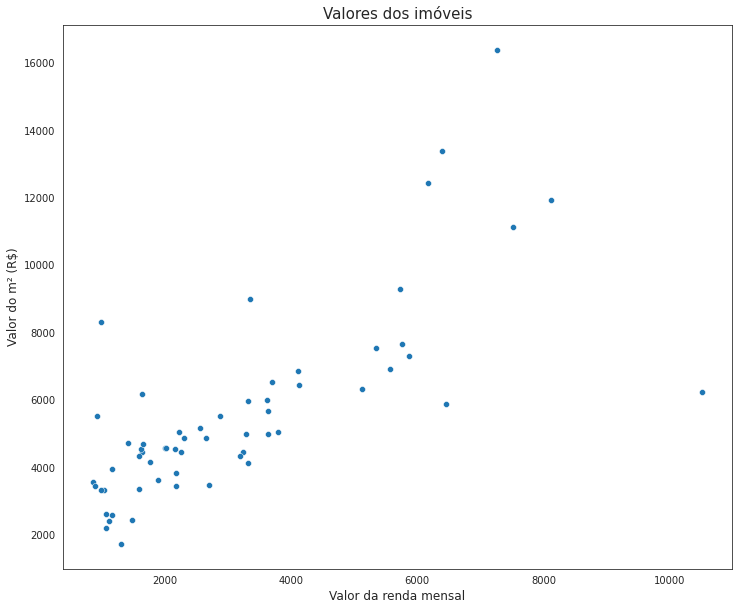

In [43]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

sns.set_style("white")

ax = sns.scatterplot(data = dados_combinados, x="V005", y="Valor_metro")

ax.set_title("Valores dos imóveis", size = 15)
ax.set_xlabel( "Valor da renda mensal", size = 12 )
ax.set_ylabel( "Valor do m² (R$)" , size = 12 )

plt.ticklabel_format(style='plain', axis='y')

plt.ticklabel_format(style='plain', axis='x')




plt.show()

Podemos perceber que existe uma relação entre as variáveis, quanto maior o valor do m² maior é a renda mensal do chefe da família. Guarde bem esse gráfico, pois talvez ele esteja distorcido pela falta de alguns dados... (mais informações na aula 4)



---


# Desafio 2: Tratar os outliers e comparar com os resultados.

Vamos voltar a primeira base de dados e tentar melhorar ela, iremos tentar identificar os outliers e ver qual o impacto deles em nossas análises.

In [44]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None


Como visto na aula anterior uma forma simples de visualizar os outliers é a partir do boxplot, segue o gráfico para a visualização:

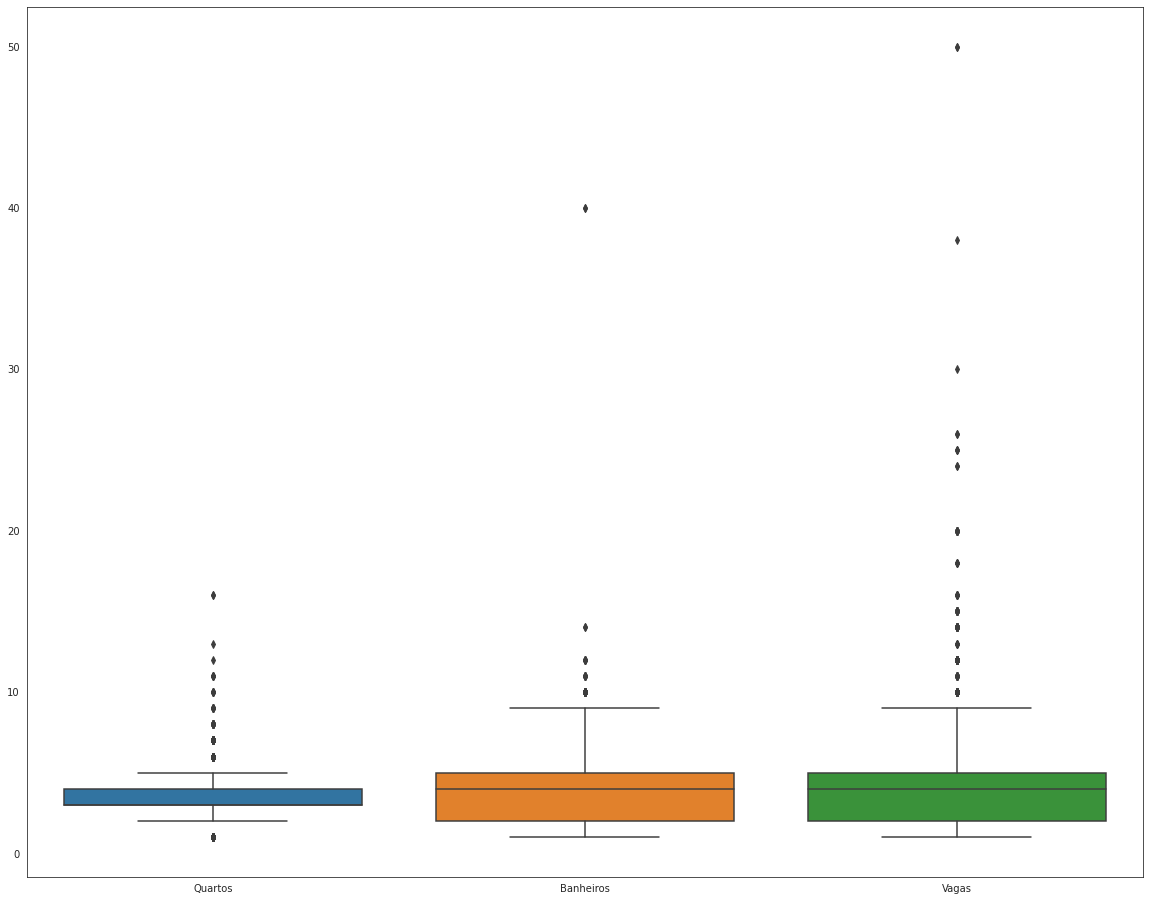

In [48]:
plt.figure(figsize=(20, 16))
sns.boxplot(data=dados_vendas[["Quartos", "Banheiros", "Vagas"]])

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
1127,Rua Bandim,Boaçava,São Paulo,350,11,8,10,R$ 2.500.000,R$,2500000.00,None
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000,R$,7500000.00,None
1726,NaN,Jardim Paulista,São Paulo,450,13,7,7,R$ 13.000.000,R$,13000000.00,None
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000,R$,2600000.00,None
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000,R$,2600000.00,None
3960,Rua Morro Verde,Pacaembu,São Paulo,1000,11,6,10,R$ 5.499.000,R$,5499000.00,None
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000,R$,3700000.00,None
5175,NaN,Parque São Lucas,São Paulo,367,12,5,4,R$ 950.000,R$,950000.00,None
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000,R$,3700000.00,None
5829,"Rua Emanuel Guedes, 252",Conjunto Residencial Butantã,São Paulo,145,11,1,2,R$ 550.000,R$,550000.00,None


A partir do gráfico podemos ter uma ideia de qual faixa de valores será considerada como outliers. E esses são os dados que iremos remover, agora vejamos a respeito da metragem

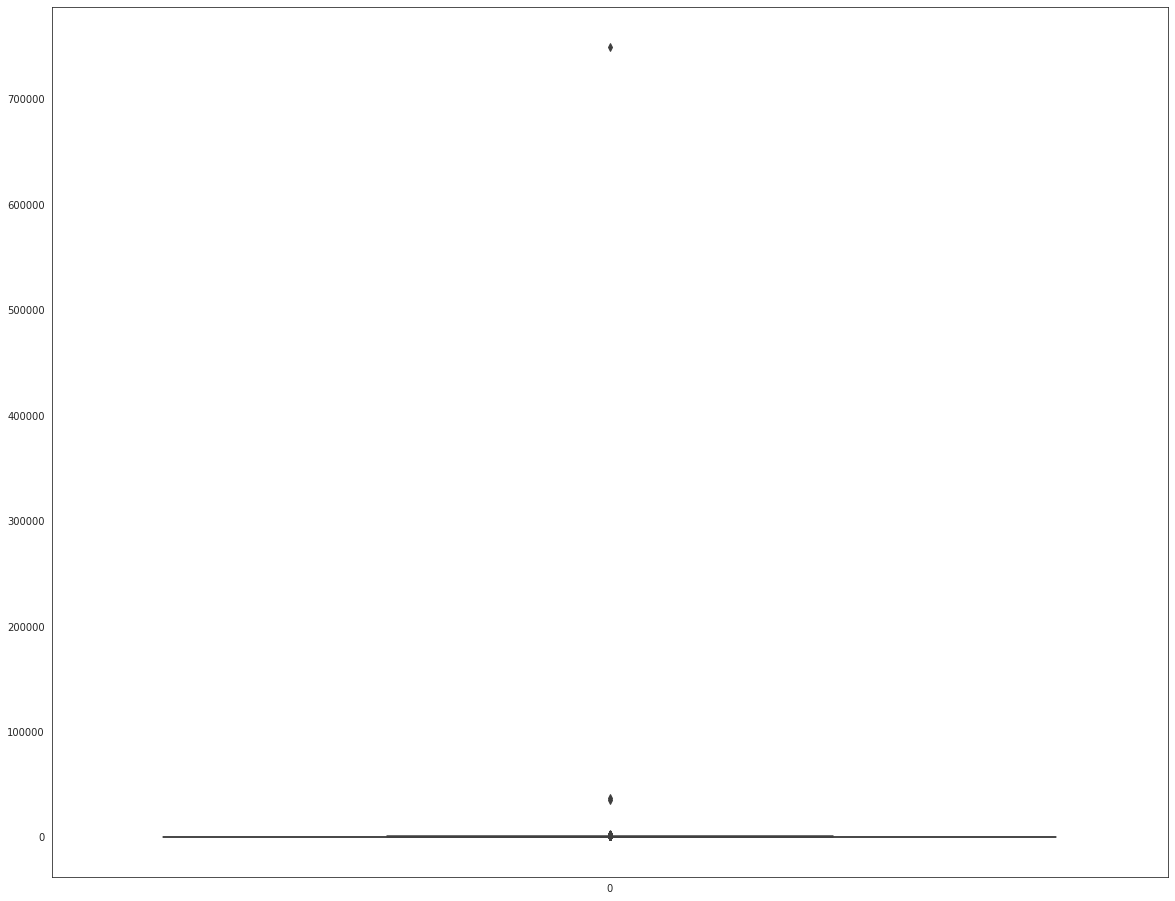

In [49]:
plt.figure(figsize=(20, 16))
sns.boxplot(data=dados_vendas["Metragem"])

In [50]:
dados_vendas.query("Metragem > 3000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000,R$,2900000.00,None
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000,R$,2550000.00,None
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000,R$,7000000.00,None


In [51]:
dados_vendas_sem_outlier = dados_vendas.query("Metragem < 3000 & Vagas < 30 & Banheiros < 20 & Quartos < 10")
dados_vendas_sem_outlier

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None


Removemos os valores considerados outliers, agora vamos analisar as possíveis mudanças

In [52]:
dados_vendas_sem_outlier = dados_vendas_sem_outlier.groupby("Bairro").sum().reset_index()
dados_vendas_sem_outlier["Valor_m2"] = dados_vendas_sem_outlier["Valor_anuncio"]/dados_vendas_sem_outlier["Metragem"]
dados_vendas_sem_outlier

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2
0,Aclimação,19447,258,240,230,139292801.00,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34
...,...,...,...,...,...,...,...
690,Vila Água Funda,761,13,11,13,3260000.00,4283.84
691,Água Branca,2083,37,39,27,14718000.00,7065.77
692,Água Fria,1985,34,41,30,11125000.00,5604.53
693,Água Funda,278,6,5,4,1090000.00,3920.86


In [53]:
top_bairros_clean = dados_vendas_sem_outlier["Bairro"].value_counts()[:10].index

top_bairros_clean

Index(['Aclimação', 'Vila Butantã', 'Vila Bela', 'Vila Bela Aliança',
       'Vila Bertioga', 'Vila Boaçava', 'Vila Bonilha Nova', 'Vila Brasilina',
       'Vila Brasílio Machado', 'Vila Buenos Aires'],
      dtype='object')

In [54]:
top_bairros

Index(['Aclimação', 'Vila Buenos Aires', 'Vila Barbosa', 'Vila Bela',
       'Vila Bela Aliança', 'Vila Bertioga', 'Vila Boaçava',
       'Vila Bonilha Nova', 'Vila Brasilina', 'Vila Brasílio Machado'],
      dtype='object')

Já podemos perceber que existe uma diferença entre os bairros que apresentaram maior quantidade de resultados, isso pode ser um sinal de que os outros bairros continham imóveis incomuns aos presentes na base.

Vejamos os gráficos abaixo

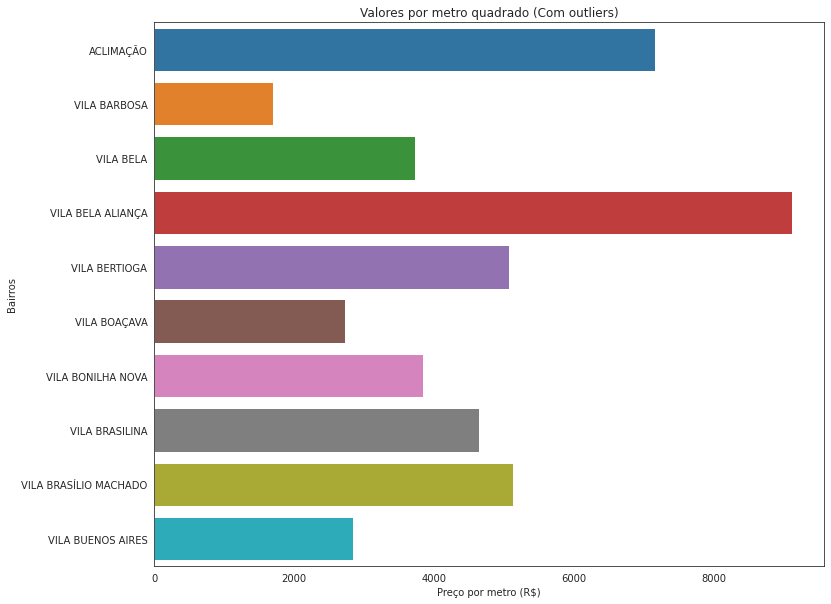

In [55]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.barplot(data = dados_bairro.query("Bairro in @top_bairros.str.upper()"), y = "Bairro", x="Valor_metro")

plt.title("Valores por metro quadrado (Com outliers)")
plt.ylabel("Bairros")


plt.xlabel("Preço por metro (R$)")


plt.show()

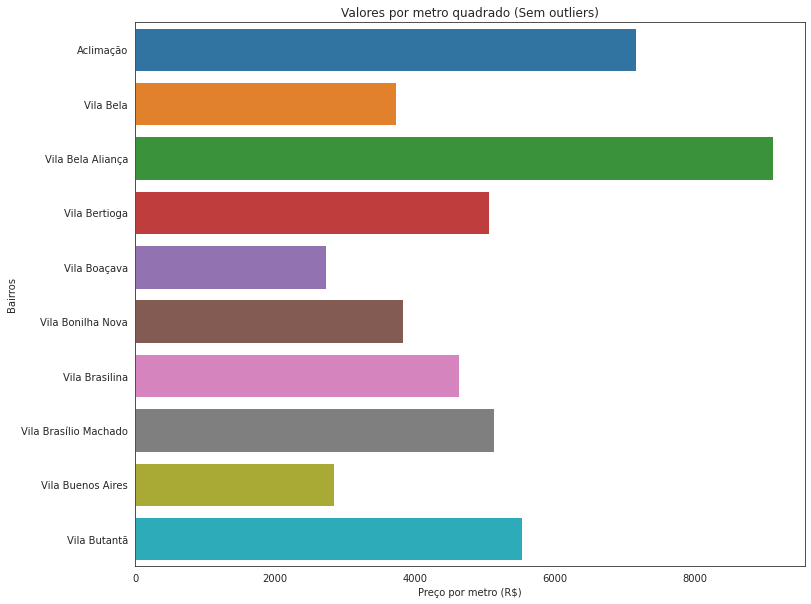

In [56]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.barplot(data = dados_vendas_sem_outlier.query("Bairro in @top_bairros_clean"), y = "Bairro", x="Valor_m2")

plt.title("Valores por metro quadrado (Sem outliers)")
plt.ylabel("Bairros")


plt.xlabel("Preço por metro (R$)")


plt.show()

Aparentemente temos grandes mudanças nas nossas informações, porém se compararmos os mesmos bairros veremos que a única mudança realmente efetiva foi na quantidade de informações bairro a bairro.

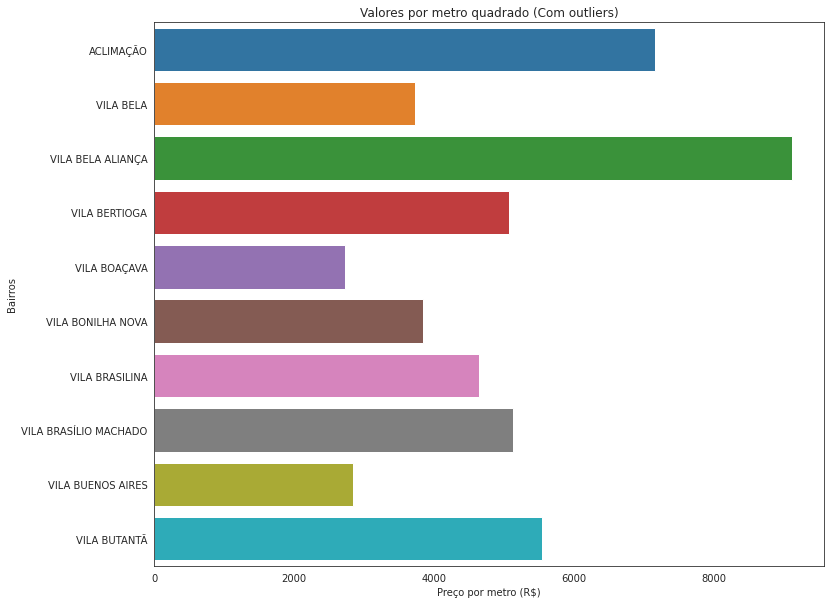

In [58]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.barplot(data = dados_bairro.query("Bairro in @top_bairros_clean.str.upper()"), y = "Bairro", x="Valor_metro")

plt.title("Valores por metro quadrado (Com outliers)")
plt.ylabel("Bairros")


plt.xlabel("Preço por metro (R$)")


plt.show()

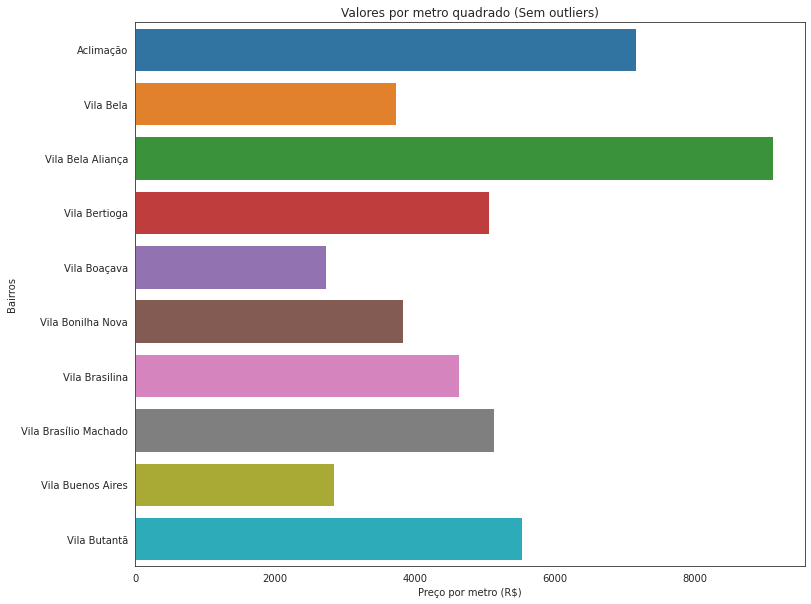

In [57]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.barplot(data = dados_vendas_sem_outlier.query("Bairro in @top_bairros_clean"), y = "Bairro", x="Valor_m2")

plt.title("Valores por metro quadrado (Sem outliers)")
plt.ylabel("Bairros")


plt.xlabel("Preço por metro (R$)")


plt.show()

Como dito, não apresenta grandes mudanças em nossos dados. Talvez seja interessante buscarmos por outras formas de extrair esses outliers.



---

# Desafio 3: Agrupar por mais de uma categoria e realizar as análises.

In [59]:
qtd_bairro_quartos = dados_vendas.groupby(["Bairro", "Quartos"]).mean().reset_index()

qtd_bairro_quartos["Valor_m2"] = qtd_bairro_quartos["Valor_anuncio"]/qtd_bairro_quartos["Metragem"]

qtd_bairro_quartos

,Bairro,Quartos,Metragem,Banheiros,Vagas,Valor_anuncio,Valor_m2
0,Aclimação,2,193.17,1.83,2.00,1281666.67,6635.03
1,Aclimação,3,218.42,2.83,2.77,1610245.30,7372.41
2,Aclimação,4,346.80,3.40,3.80,2318653.33,6685.85
3,Aclimação,5,335.00,6.67,3.33,2533333.33,7562.19
4,Aclimação,6,252.50,4.00,2.00,1940000.00,7683.17
...,...,...,...,...,...,...,...
1428,Água Fria,3,212.17,4.17,2.50,1162500.00,5479.18
1429,Água Fria,4,221.00,4.50,3.50,1285000.00,5814.48
1430,Água Funda,3,139.00,2.50,2.00,545000.00,3920.86
1431,Água Rasa,2,213.50,1.50,3.50,637500.00,2985.95


Temos agora os dados agrupados por bairros e subgrupos dentro de cada bairro representados pela quantidade de quartos. 

Vamos observar o que acontece com a quantidade de banheiros, com o tamanho dos apartamentos e com valor do m² de acordo com o aumento de quartos para um determinado bairro.

In [61]:
qtd_bairro_quartos.query("Bairro == 'Aclimação'")

,Bairro,Quartos,Metragem,Banheiros,Vagas,Valor_anuncio,Valor_m2
0,Aclimação,2,193.17,1.83,2.00,1281666.67,6635.03
1,Aclimação,3,218.42,2.83,2.77,1610245.30,7372.41
2,Aclimação,4,346.80,3.40,3.80,2318653.33,6685.85
3,Aclimação,5,335.00,6.67,3.33,2533333.33,7562.19
4,Aclimação,6,252.50,4.00,2.00,1940000.00,7683.17


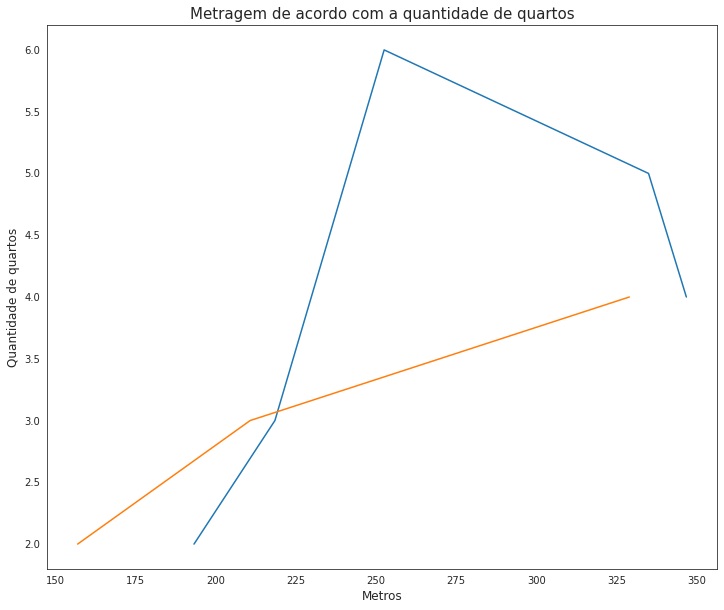

In [77]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.lineplot(data = qtd_bairro_quartos.query("Bairro == 'Aclimação'"), x="Metragem", y="Quartos")

sns.lineplot(data = qtd_bairro_quartos.query("Bairro == 'Vila Bertioga'"), x="Metragem", y="Quartos")

ax.set_title("Metragem de acordo com a quantidade de quartos", size = 15)
ax.set_xlabel( "Metros", size = 12 )
ax.set_ylabel( "Quantidade de quartos" , size = 12 )

plt.show()

Ao pegar uma amostra do conjunto de bairros vemos que o tamanho do imóvel tende a aumentar de acordo com a quantidade de quartos.

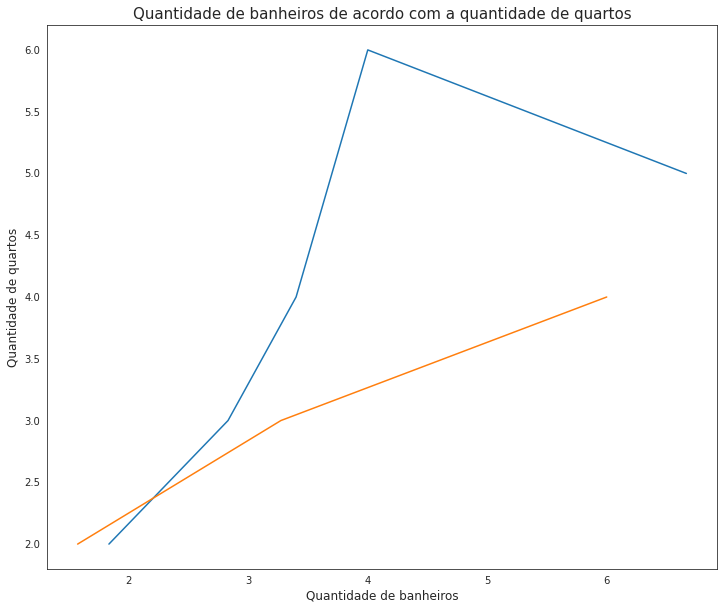

In [79]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.lineplot(data = qtd_bairro_quartos.query("Bairro == 'Aclimação'"), x="Banheiros", y="Quartos")

sns.lineplot(data = qtd_bairro_quartos.query("Bairro == 'Vila Bertioga'"), x="Banheiros", y="Quartos")

ax.set_title("Quantidade de banheiros de acordo com a quantidade de quartos", size = 15)
ax.set_xlabel( "Quantidade de banheiros", size = 12 )
ax.set_ylabel( "Quantidade de quartos" , size = 12 )

plt.show()

Da mesma forma o número de banheiros.

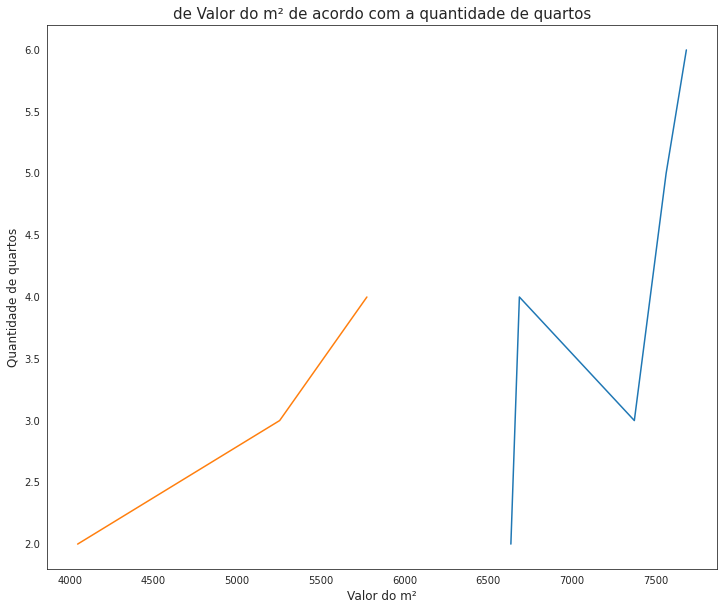

In [80]:
plt.figure(figsize=(12, 10))

sns.set_style("white")



ax = sns.lineplot(data = qtd_bairro_quartos.query("Bairro == 'Aclimação'"), x="Valor_m2", y="Quartos")

sns.lineplot(data = qtd_bairro_quartos.query("Bairro == 'Vila Bertioga'"), x="Valor_m2", y="Quartos")

ax.set_title("de Valor do m² de acordo com a quantidade de quartos", size = 15)
ax.set_xlabel( "Valor do m²", size = 12 )
ax.set_ylabel( "Quantidade de quartos" , size = 12 )

plt.show()

Por fim, notamos que os valores tendem a crescer de acordo com a quantidade de quartos, nos levando a crer que existe uma correlação forte entre esse valores.